En este notebook se realiza una conversión de las imagenes 3D de resonancia magnetica del dataset MR-ART https://openneuro.org/datasets/ds004173/versions/1.0.2, a imagenes 2D. 

Se realiza un recorte de las imagenes 3D para poder entrenar una red neuronal convolucional 2D, a conciencia de que una CNN 3D sería más adecuada para este tipo de datos, pero por limitaciones de hardware y tiempo de entreno se opta por esta solución.

In [13]:
# Importación de las librerías necesarias para la ejecución del código
import numpy as np
import os 
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
# Creamos un directorio para guardar las imágenes, seperadas por las clases que aprendera la CNN
output = '../png-dataset/' #path to store png files 
root = '../original-dataset' #path to where data is stored
os.mkdir(output)
os.mkdir(output + 'ones/')
os.mkdir(output + 'twos/')
os.mkdir(output + 'threes/')

# Visualización del dataset por cortes

Visualizamos algunos los cortes de una imagen que trataremos para entender como quedan las imágenes

Total slices in the image: 192


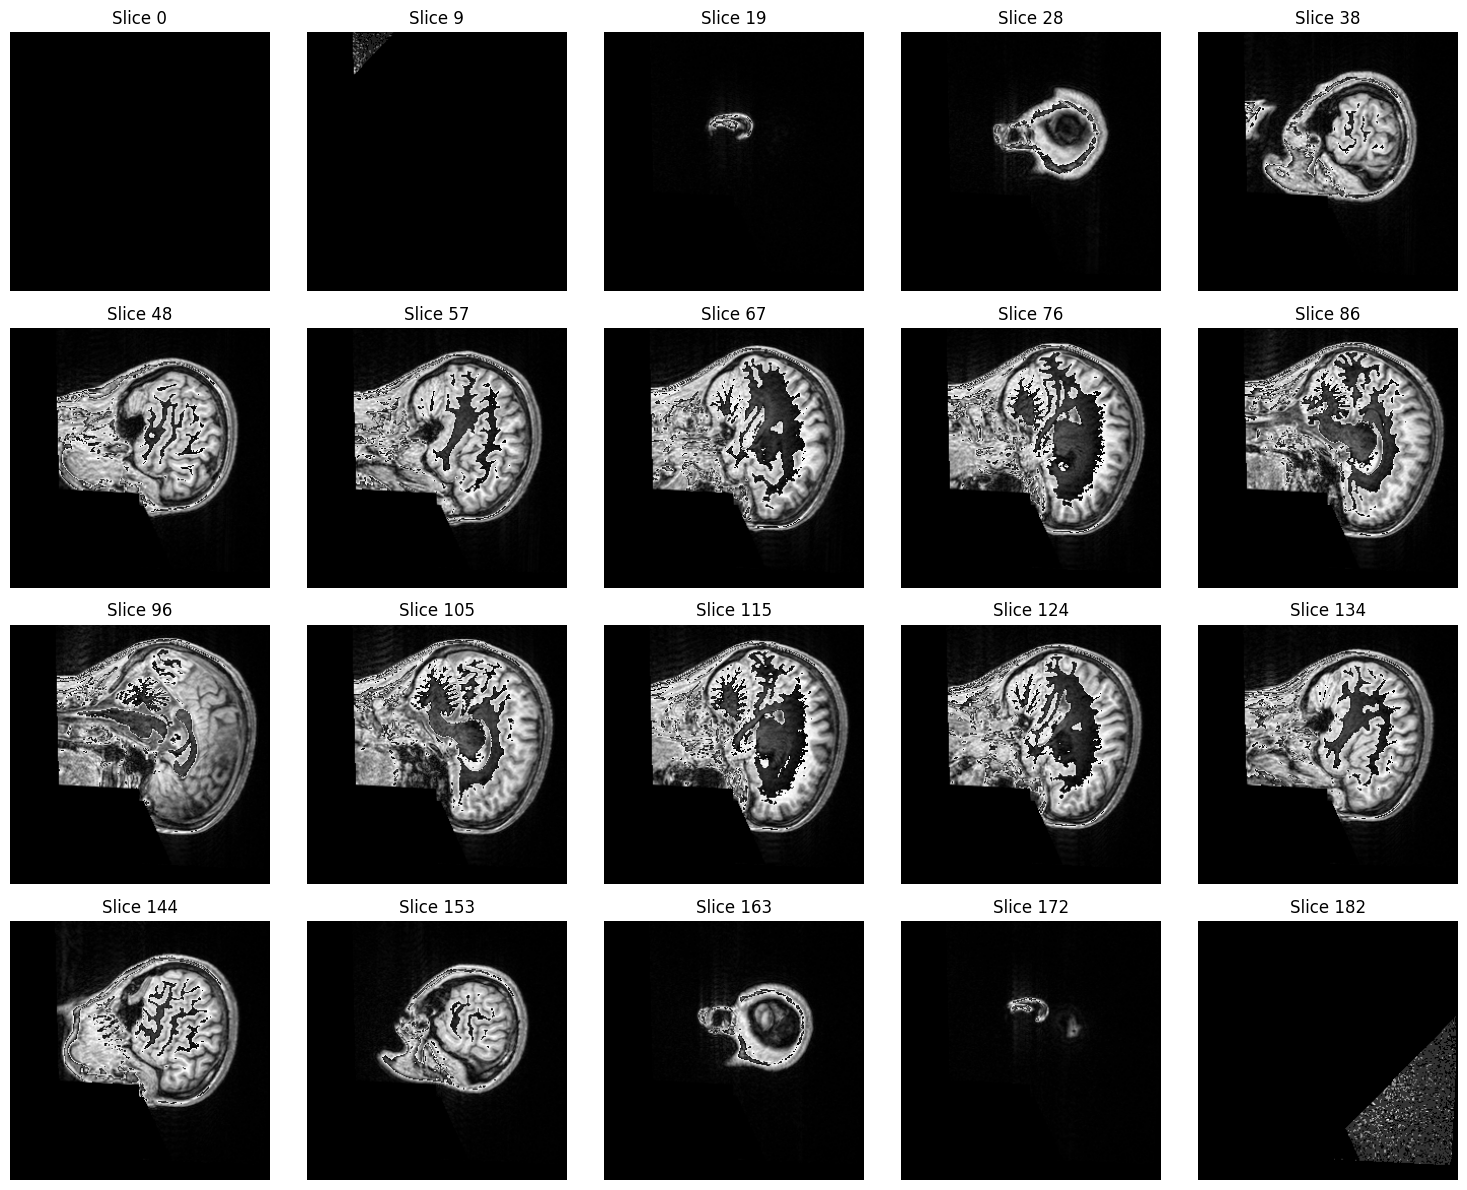

In [23]:
# Ruta del archivo de la primera imagen
file_path = '../original-dataset/sub-313623/anat/sub-313623_acq-headmotion1_T1w.nii.gz'

# Cargar la imagen
img = nib.load(file_path)
img_data = np.uint8(np.array(img.dataobj))

# Crear un grid para mostrar los cortes
num_rows = 4  # Número de filas en el grid
num_cols = 5  # Número de columnas en el grid
total_slices = num_rows * num_cols  # Número total de cortes a mostrar

# Crear la figura y los ejes para el grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

calc_total_slices = img_data.shape[0]  # Número total de cortes en la imagen
print(f'Total slices in the image: {calc_total_slices}')

# Mostrar los cortes en el grid
for i, ax in enumerate(axes.flat):
    slice_index = i * img_data.shape[0] // total_slices  # Obtener el índice del corte
    slice_img = img_data[slice_index]
    ax.imshow(slice_img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Slice {slice_index}')

plt.tight_layout()
plt.show()




# Procesado de las imagenes

In [11]:
# Cargamos el archivo de scores para poder clasificar las imágenes en las carpetas correspondientes
scores = pd.read_csv(root+ '/derivatives/scores.tsv', sep='\t')

# Iteramos sobre las imágenes y las guardamos en el directorio correspondiente dependiendo de su clase
for i,file in enumerate(scores['bids_name']):
    file_path = root+ '/' + file.split('_') [0] + '/anat/' + file + '.nii.gz'
    if scores.iloc[i, 1] == 1:
        folder = 'ones/'
    elif scores.iloc[i, 1] == 2:
        folder = 'twos/'
    elif scores.iloc[i, 1] == 3:
        folder = 'threes/'
        
    img = nib.load(file_path)
    img = np.uint8(np.array(img.dataobj))
    for slices in range(img.shape[0]):
        im = Image.fromarray(img[slices])
        output_file = output  + folder + file + '_slice_' + str(slices) + '.png'
        im.save(output_file)

print('Imagenes guardadas en el directorio: ' + output)
   

Imagenes guardadas en el directorio: C:/Users/Pau/Documents/VisualStudioCode/MIA-TFM/png-dataset/


# Conclusión

Podemos observar que muchas imagenes, como las 3 primeras de cada fila, no aportan información relevante y además pueden causar interferencias en el entrenamiento ya que la CNN puede clasificarlas en cualquier clase.

Esta información se tendra en cuenta para el siguiente notebook donde se realizará un preprocesado de las imagenes.